In [202]:
#import thu vien
from bs4 import BeautifulSoup
import requests
from csv import DictWriter
import pandas as pd
import datetime
from datetime import date
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [203]:
#câu 1
#url trang web
base_url = 'http://quotes.toscrape.com/'
content=list()
contents= requests.get(base_url)
soup = BeautifulSoup(contents.text, 'html.parser')
content_html=soup.find_all('div', class_="container")
for contents in content_html:
    content.append(contents.text)
#chuyen list thành str  
content = "".join(content)  
#ghi noi dung vao file
with open('./kq.txt', 'a+',encoding='utf-8') as f:
    f.write(content)
    f.close()
next_btn = soup.find(class_='next')      
    #lấy quotes
quotes_html = soup.find_all('div' , class_="quote")
result=list()
for results in quotes_html:
    result.append(results.text)
result = "".join(result)
print("Quotes: " + result.replace("\n",""))   
#lấy author
authors_html = soup.find_all('small' , class_="author")
author=list()
for authors in authors_html:
    author.append(authors.text)
author = "".join(author)
print("Tác giả: " +author.replace("\n",""))  
quote_list=list()
   

Quotes: “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”by Albert Einstein(about)            Tags:            changedeep-thoughtsthinkingworld“It is our choices, Harry, that show what we truly are, far more than our abilities.”by J.K. Rowling(about)            Tags:            abilitieschoices“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”by Albert Einstein(about)            Tags:            inspirationallifelivemiraclemiracles“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”by Jane Austen(about)            Tags:            aliteracybooksclassichumor“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”by Marilyn Monroe(about)            Tags:            be-yourselfinspirational“Try not to become a man of success. Rather become

In [204]:
#lấy thong tin tac gia
def tacgialink():
    base1_url = 'http://quotes.toscrape.com/'
    url1 = '/page/1'
    tong=1
    while url1:
        content=list()
        contents= requests.get(f'{base1_url}{url1}')
        soup = BeautifulSoup(contents.text, 'html.parser')
        print(f'Trang:{tong} {base1_url}{url1}')
        quotes_html = soup.find_all('div' , class_="quote")
        next_btn = soup.find(class_='next') 
        for quote in quotes_html:
            base_url = 'http://quotes.toscrape.com/'
            url=quote.find('a')['href']
            birthday= requests.get(f'{base_url}{url}')
            soup_day = BeautifulSoup(birthday.text, 'html.parser')
            quote_list.append({
                'caunoi':quote.find(class_='text').get_text(),
                'tacgia': quote.find(class_='author').get_text(),
                'link': "http://quotes.toscrape.com"+quote.find('a')['href'],
                'namsinh':soup_day.find(class_="author-born-date").get_text()})
        tong+=1
        url1 = next_btn.find('a')['href'] if next_btn and tong<5  else None
    print(quote_list)
    write_quotes(quote_list) 
#ghi vào file quotes.csv
def write_quotes(quotes):
    with open('quotes.csv', 'w') as file:
        headers = ['caunoi', 'tacgia', 'link','namsinh']
        csv_writer = DictWriter(file, fieldnames=headers)
        csv_writer.writeheader()
        for quote in quotes:
            csv_writer.writerow(quote)
tacgialink()

Trang:1 http://quotes.toscrape.com//page/1
Trang:2 http://quotes.toscrape.com//page/2/
Trang:3 http://quotes.toscrape.com//page/3/
Trang:4 http://quotes.toscrape.com//page/4/
[{'caunoi': '“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”', 'tacgia': 'Albert Einstein', 'link': 'http://quotes.toscrape.com/author/Albert-Einstein', 'namsinh': 'March 14, 1879'}, {'caunoi': '“It is our choices, Harry, that show what we truly are, far more than our abilities.”', 'tacgia': 'J.K. Rowling', 'link': 'http://quotes.toscrape.com/author/J-K-Rowling', 'namsinh': 'July 31, 1965'}, {'caunoi': '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”', 'tacgia': 'Albert Einstein', 'link': 'http://quotes.toscrape.com/author/Albert-Einstein', 'namsinh': 'March 14, 1879'}, {'caunoi': '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be 

In [205]:
#đọc file csv
df=pd.read_csv("quotes.csv",sep=",", header = 0, index_col = None,encoding= 'unicode_escape')
df.head()

,caunoi,tacgia,link,namsinh
0,The world as we have created it is a process ...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879"
1,"It is our choices, Harry, that show what we t...",J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965"
2,There are only two ways to live your life. On...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879"
3,"The person, be it gentleman or lady, who has ...",Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775"
4,"Imperfection is beauty, madness is genius and...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926"


In [206]:
#bỏ kí tự thừa
b=[]
for i in df['caunoi']:
    b.append(i[1:-1])
df['caunoi']=b

In [207]:
df.head()

,caunoi,tacgia,link,namsinh
0,The world as we have created it is a process o...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879"
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965"
2,There are only two ways to live your life. One...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879"
3,"The person, be it gentleman or lady, who has n...",Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775"
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926"


In [208]:
#kiểm tra xem có trường ngày sinh nào chưa có không
df['namsinh'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
Name: namsinh, dtype: bool

In [209]:
#2.1
today=date.today()

In [210]:
#tính tuổi
a=[]
for i in df['namsinh']:
   a.append(today.year-int(i[-4:]))

In [211]:
#thêm cột tuổi vào
df.head()
df['tuoi']=a

In [212]:
df.head()

,caunoi,tacgia,link,namsinh,tuoi
0,The world as we have created it is a process o...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",142
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965",56
2,There are only two ways to live your life. One...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",142
3,"The person, be it gentleman or lady, who has n...",Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775",246
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926",95


In [213]:
#thống kê các thông tin về tuổi của các tác giả
df.describe()

,tuoi
count,40.000000
mean,117.300000
std,46.876926
min,56.000000
25%,76.000000
50%,117.000000
75%,142.000000
max,246.000000


In [214]:
#có 40 giá trị không null
#độ tuổi trung bình là 117,3
#độ lệch chuẩn là 46,8(các độ tuổi trung bình cách nhau là 46,8)
#tuổi nhỏ nhất là 56

In [215]:
#2.2
#thống kê các tác giả có khả năng còn sống(tuoi<100)
df[df['tuoi']<100]

,caunoi,tacgia,link,namsinh,tuoi
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965",56
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926",95
9,"A day without sunshine is like, you know, night.",Steve Martin,http://quotes.toscrape.com/author/Steve-Martin,"August 14, 1945",76
10,"This life is what you make it. No matter what,...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926",95
11,It takes a great deal of bravery to stand up t...,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965",56
13,"You may not be her first, her last, or her onl...",Bob Marley,http://quotes.toscrape.com/author/Bob-Marley,"February 06, 1945",76
15,"I may not have gone where I intended to go, bu...",Douglas Adams,http://quotes.toscrape.com/author/Douglas-Adams,"March 11, 1952",69
16,"The opposite of love is not hate, it's indiffe...",Elie Wiesel,http://quotes.toscrape.com/author/Elie-Wiesel,"September 30, 1928",93
23,Anyone who thinks sitting in church can make y...,Garrison Keillor,http://quotes.toscrape.com/author/Garrison-Kei...,"August 07, 1942",79
24,Beauty is in the eye of the beholder and it ma...,Jim Henson,http://quotes.toscrape.com/author/Jim-Henson,"September 24, 1936",85


In [216]:
#hiện tác giả có độ tuổi lớn nhất
df[['tacgia','tuoi']][df.tuoi == df.tuoi.max()]

,tacgia,tuoi
3,Jane Austen,246


In [217]:
#hiện tác giả có độ tuổi nhỏ nhất
df[['tacgia','tuoi']][df.tuoi == df.tuoi.min()].iloc[:1]

,tacgia,tuoi
1,J.K. Rowling,56


In [218]:
#thống kê các tác giả có độ tuổi lớn hơn 50 và dưới 100
df[['tacgia','tuoi']][(df.tuoi>50) & (df.tuoi<100)]

,tacgia,tuoi
1,J.K. Rowling,56
4,Marilyn Monroe,95
9,Steve Martin,76
10,Marilyn Monroe,95
11,J.K. Rowling,56
13,Bob Marley,76
15,Douglas Adams,69
16,Elie Wiesel,93
23,Garrison Keillor,79
24,Jim Henson,85


<AxesSubplot:title={'center':'thống kê độ tuổi tác giả '}, ylabel='Frequency'>

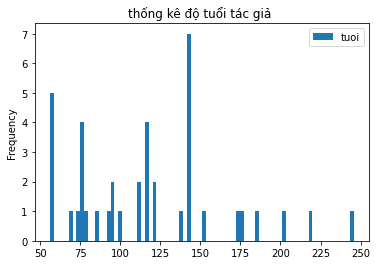

In [219]:
#vẽ biểu đồ hiện tuổi
df[['tuoi']].plot.hist(bins =80, title = 'thống kê độ tuổi tác giả ')

In [220]:
#thống kê câu nói của tác giả dựa vào tên
d=input("nhap ten tac gia")
print("tác giả: " + d+" có câu nói là")
df[['caunoi']][df.tacgia==d]

nhap ten tac giaJ.K. Rowling
tác giả: J.K. Rowling có câu nói là


,caunoi
1,"It is our choices, Harry, that show what we tr..."
11,It takes a great deal of bravery to stand up t...
27,It is impossible to live without failing at so...
31,"Of course it is happening inside your head, Ha..."
34,"To the well-organized mind, death is but the n..."


In [221]:
#thống kế số lượng từ
c=[]
for i in df['caunoi']:
   c.append(len(i))
df['soluongtu']=c
df[['caunoi','soluongtu']]

,caunoi,soluongtu
0,The world as we have created it is a process o...,113
1,"It is our choices, Harry, that show what we tr...",83
2,There are only two ways to live your life. One...,129
3,"The person, be it gentleman or lady, who has n...",102
4,"Imperfection is beauty, madness is genius and ...",109
5,Try not to become a man of success. Rather bec...,65
6,It is better to be hated for what you are than...,80
7,"I have not failed. I've just found 10,000 ways...",63
8,A woman is like a tea bag; you never know how ...,83
9,"A day without sunshine is like, you know, night.",48


In [222]:
#hiện tác giả có câu nói dài nhất
max=len(df['caunoi'].iloc[:1])
for i in df['caunoi']:
    if len(i)>max:
        max=len(i)
        a=i
df[['tacgia','caunoi','soluongtu']][df.caunoi == a]

,tacgia,caunoi,soluongtu
10,Marilyn Monroe,"This life is what you make it. No matter what,...",1082


In [223]:
#hiện tác giả có câu nói ngắn nhất
min=len(df['caunoi'].iloc[:1])
for i in df['caunoi']:
    if len(i)<max:
        max=len(i)
        a=i
df[['tacgia','caunoi','soluongtu']][df.caunoi == a]

,tacgia,caunoi,soluongtu
36,William Nicholson,We read to know we're not alone.,32


In [224]:
#thống kê số lượng câu nói của các giả có trong bảng
for i in df['tacgia']:
    print(i)

Albert Einstein
J.K. Rowling
Albert Einstein
Jane Austen
Marilyn Monroe
Albert Einstein
André Gide
Thomas A. Edison
Eleanor Roosevelt
Steve Martin
Marilyn Monroe
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
Douglas Adams
Elie Wiesel
Friedrich Nietzsche
Mark Twain
Allen Saunders
Pablo Neruda
Ralph Waldo Emerson
Mother Teresa
Garrison Keillor
Jim Henson
Dr. Seuss
Albert Einstein
J.K. Rowling
Albert Einstein
Bob Marley
Dr. Seuss
J.K. Rowling
Bob Marley
Mother Teresa
J.K. Rowling
Charles M. Schulz
William Nicholson
Albert Einstein
Jorge Luis Borges
George Eliot


In [225]:
from collections import Counter
counts = Counter(x for x in df['tacgia'])
counts

Counter({'Albert Einstein': 7,
         'J.K. Rowling': 5,
         'Jane Austen': 1,
         'Marilyn Monroe': 2,
         'André Gide': 1,
         'Thomas A. Edison': 1,
         'Eleanor Roosevelt': 1,
         'Steve Martin': 1,
         'Bob Marley': 3,
         'Dr. Seuss': 3,
         'Douglas Adams': 1,
         'Elie Wiesel': 1,
         'Friedrich Nietzsche': 1,
         'Mark Twain': 1,
         'Allen Saunders': 1,
         'Pablo Neruda': 1,
         'Ralph Waldo Emerson': 1,
         'Mother Teresa': 2,
         'Garrison Keillor': 1,
         'Jim Henson': 1,
         'Charles M. Schulz': 1,
         'William Nicholson': 1,
         'Jorge Luis Borges': 1,
         'George Eliot': 1})

In [226]:
#2.4
#chuyển đổi dữ liệu chữ sang số để mang đi train/test
from sklearn.preprocessing import LabelEncoder
y = df['tacgia']
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [227]:
#tạo ra module để đưa vào hàm counterVector
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()
def text_process(text):
    #Thay thế dấu câu
    a=[i for i in text if i not in string.punctuation]
    a=''.join(a)
    #Nhóm các từ cùng loại lại với nhau để cho đoạn text chứa các từ riêng biệt
    b=''
    j=0
    for j in range(len(a.split())):
        c=lemmatiser.lemmatize(a.split()[j], pos="v")
        b=b+c+' '
    #Thay thế các từ không có nghĩa như mạo từ,giới từ
    return [word for word in b.split() if word.lower() not 
            in stopwords.words('english')]

In [228]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
#80% mang đi train và 20% mang đi test
X=df['caunoi']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=11)
#tạo ra vector đếm tần suất các từ xuất hiện trong câu nói
bow_trans=CountVectorizer(analyzer=text_process).fit(X_train)
#dựa vào bag of word chuyển đổi dữ liệu văn bản chữ thành số
bow_train=bow_trans.transform(X_train) #chỉ dữ liệu train
bow_test=bow_trans.transform(X_test) #chỉ dữ liệu test


In [229]:
#mang dữ liệu vào thư viện để bắt đầu training
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
#training model
model = model.fit(bow_train, y_train)
#xem độ chính xác của dữ liệu train
model.score(bow_train, y_train)

0.96875

In [230]:
#xem độ chính xác của dữ liệu test sau khi đã train xong
model.score(bow_test, y_test)

0.25

In [231]:
from sklearn.metrics import classification_report
#dự đoán dựa vào mô hình đã train
predictions = model.predict(bow_test)
# in ra ma trận
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1

    accuracy                           0.25         8
   macro avg       0.20      0.20      0.20         8
weighted avg       0.25      0.25      0.25         8



c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [232]:
#chỉ đúng được có 25%
#lí do vì bộ dự liệu ít chỉ có 40 giá trị
#dự đoán ra 12 và 0 là J.K. Rowling và Albert Einstein  vì 2 tác giả này xuất hiện nhiều trong bộ dữ liệu
model.predict(bow_test)

array([12,  3,  3,  6,  6,  3,  0,  3])

In [233]:
y_test

array([12, 10,  1,  7, 21, 20,  0, 19])

In [234]:
#in ra tác giả đã dự đoán đúng
a=list(y)
df['tacgia'][a.index(0)]

'Albert Einstein'

In [235]:
df['tacgia'][a.index(12)]

'J.K. Rowling'

In [236]:
bow_trans1=CountVectorizer(analyzer=text_process).fit(X)
bow=bow_trans1.transform(X)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [245]:
d=list()
for i in bow.toarray():
    d.append(i)
df['mang']=d
df.head()

,caunoi,tacgia,link,namsinh,tuoi,soluongtu,mang
0,The world as we have created it is a process o...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",142,113,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"It is our choices, Harry, that show what we tr...",J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,"July 31, 1965",56,83,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,There are only two ways to live your life. One...,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,"March 14, 1879",142,129,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"The person, be it gentleman or lady, who has n...",Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,"December 16, 1775",246,102,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"Imperfection is beauty, madness is genius and ...",Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,"June 01, 1926",95,109,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."


In [249]:

for i in range(0,40):
    for j in range(i+1,40):
        a=df['mang'][i]-df['mang'][j]
        if sum(a)<1 and sum(a)>-1:
            print(df['tacgia'][i]+" có nét tương đồng với "+df['tacgia'][j])

Albert Einstein có nét tương đồng với Jane Austen
Albert Einstein có nét tương đồng với Marilyn Monroe
Albert Einstein có nét tương đồng với Eleanor Roosevelt
Albert Einstein có nét tương đồng với J.K. Rowling
Albert Einstein có nét tương đồng với Dr. Seuss
Albert Einstein có nét tương đồng với Bob Marley
J.K. Rowling có nét tương đồng với Steve Martin
J.K. Rowling có nét tương đồng với Dr. Seuss
J.K. Rowling có nét tương đồng với Albert Einstein
J.K. Rowling có nét tương đồng với J.K. Rowling
J.K. Rowling có nét tương đồng với Charles M. Schulz
Albert Einstein có nét tương đồng với Albert Einstein
Jane Austen có nét tương đồng với Marilyn Monroe
Jane Austen có nét tương đồng với Eleanor Roosevelt
Jane Austen có nét tương đồng với J.K. Rowling
Jane Austen có nét tương đồng với Dr. Seuss
Jane Austen có nét tương đồng với Bob Marley
Marilyn Monroe có nét tương đồng với Eleanor Roosevelt
Marilyn Monroe có nét tương đồng với J.K. Rowling
Marilyn Monroe có nét tương đồng với Dr. Seuss
Maril